<center>
<h1> TP-Projet d'optimisation numérique </h1>
<h1> Algorithme du Lagrangien Augmenté </h1>
</center>

In [75]:
import Pkg; Pkg.add("Documenter")

   Resolving package versions...


  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


## Implémentation

1. Implémenter l'algorithme du lagrangien augmenté, en utilisant les différentes méthodes
qui ont été vues en première partie pour la résolution de la suite de problémes sans
contraintes (fichier `Lagrangien_Augmente.jl`). La spécification de l'algorithme du Lagrangien augmenté est donnée ci-dessous.
 

In [76]:
using LinearAlgebra
using Documenter
using Markdown  
include("Lagrangien_Augmente.jl")
@doc Lagrangien_Augmente

#### Objet

Résolution des problèmes de minimisation avec une contrainte d'égalité scalaire par l'algorithme du lagrangien augmenté.

#### Syntaxe

```julia
xmin,fxmin,flag,iter,muks,lambdaks = Lagrangien_Augmente(algo,f,gradf,hessf,c,gradc,hessc,x0,options)
```

#### Entrées

  * algo : (String) l'algorithme sans contraintes à utiliser:

      * "newton"  : pour l'algorithme de Newton
      * "cauchy"  : pour le pas de Cauchy
      * "gct"     : pour le gradient conjugué tronqué
  * f : (Function) la fonction à minimiser
  * gradf       : (Function) le gradient de la fonction
  * hessf       : (Function) la hessienne de la fonction
  * c     : (Function) la contrainte [x est dans le domaine des contraintes ssi $c(x)=0$]
  * gradc : (Function) le gradient de la contrainte
  * hessc : (Function) la hessienne de la contrainte
  * x0 : (Array{Float,1}) la première composante du point de départ du Lagrangien
  * options : (Array{Float,1})

    1. epsilon     : utilisé dans les critères d'arrêt
    2. tol         : la tolérance utilisée dans les critères d'arrêt
    3. itermax     : nombre maximal d'itération dans la boucle principale
    4. lambda0     : la deuxième composante du point de départ du Lagrangien
    5. mu0, tho    : valeurs initiales des variables de l'algorithme

#### Sorties

  * xmin : (Array{Float,1}) une approximation de la solution du problème avec contraintes
  * fxmin : (Float) $f(x_{min})$
  * flag : (Integer) indicateur du déroulement de l'algorithme

      * 0    : convergence
      * 1    : nombre maximal d'itération atteint
      * (-1) : une erreur s'est produite
  * niters : (Integer) nombre d'itérations réalisées
  * muks : (Array{Float64,1}) tableau des valeurs prises par mu_k au cours de l'exécution
  * lambdaks : (Array{Float64,1}) tableau des valeurs prises par lambda_k au cours de l'exécution

#### Exemple d'appel

```julia
using LinearAlgebra
algo = "gct" # ou newton|gct
f(x)=100*(x[2]-x[1]^2)^2+(1-x[1])^2
gradf(x)=[-400*x[1]*(x[2]-x[1]^2)-2*(1-x[1]) ; 200*(x[2]-x[1]^2)]
hessf(x)=[-400*(x[2]-3*x[1]^2)+2  -400*x[1];-400*x[1]  200]
c(x) =  (x[1]^2) + (x[2]^2) -1.5
gradc(x) = [2*x[1] ;2*x[2]]
hessc(x) = [2 0;0 2]
x0 = [1; 0]
options = []
xmin,fxmin,flag,iter,muks,lambdaks = Lagrangien_Augmente(algo,f,gradf,hessf,c,gradc,hessc,x0,options)
```

#### Tolérances des algorithmes appelés

Pour les tolérances définies dans les algorithmes appelés (Newton et régions de confiance), prendre les tolérances par défaut définies dans ces algorithmes.


3. Vérifier que les tests ci-dessous passent.

In [77]:
using Test

# Tolérance pour les tests d'égalité
tol_erreur = sqrt(eps())

## ajouter les fonctions de test
include("../test/fonctions_de_tests.jl")
include("../test/tester_lagrangien_augmente.jl")
include("../src/Algorithme_De_Newton.jl")
include("../src/Pas_De_Cauchy.jl")
include("../src/Gradient_Conjugue_Tronque.jl")
include("../src/Regions_De_Confiance.jl")
include("../src/Lagrangien_Augmente.jl")

affiche = false

@testset "Test lagrangien augmente" begin
	tester_lagrangien_augmente(affiche, Lagrangien_Augmente)
end;

Test Summary:            | Pass  Total  Time
Test lagrangien augmente |   12     12  1.6s


## Interprétation

 1. Commenter les résultats obtenus, en étudiant notamment les valeurs de $\lambda_k$ et $\mu_k$.
 
 2. Étudier l'influence du paramètre $\tau$ dans la performance de l'algorithme. Pour cela Vous réaliserez des tests numériques.
 
 3. **Supplémentaire** : 
      Que proposez-vous comme méthode pour la résolution des problèmes avec
      des contraintes à la fois d'égalité et d'inégalité ? Implémenter (si le temps le permet)
      ce nouvel algorithme.

In [78]:
using Pkg;
Pkg.add("Plots"); 
using Plots

include("../test/fonctions_de_tests.jl")
include("../src/Algorithme_De_Newton.jl")
include("../src/Pas_De_Cauchy.jl")
include("../src/Gradient_Conjugue_Tronque.jl")
include("../src/Regions_De_Confiance.jl")
include("../src/Lagrangien_Augmente.jl")

   Resolving package versions...


  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


Lagrangien_Augmente

In [79]:
lambda0 = 2
mu0 = 10
tho = 2
epsilon = 1.
tol = 1e-5
max_iters = 1000
options = [epsilon, tol, max_iters, lambda0, mu0, tho]
# La tolérance utilisée dans les tests
algos = ["newton", "gct", "cauchy"]
muk1=[]
muk2=[]
muk3=[]
muk4=[]
lambdak1=[]
lambdak2=[]
lambdak3=[]
lambdak4=[]

for algo in algos
    # le cas de test 1
    _,_,_,_, muks, lambdaks = Lagrangien_Augmente(algo,fct1,contrainte1,grad_fct1,hess_fct1,grad_contrainte1,hess_contrainte1,pts2.x01,options)
    push!(muk1,muks)
    push!(lambdak1,lambdaks)
    # le cas de test 2
    _,_,_,_,muk,lambdak = Lagrangien_Augmente(algo,fct1,contrainte1,grad_fct1,hess_fct1,grad_contrainte1,hess_contrainte1,pts2.x02,options)
    push!(muk2,muk)
    push!(lambdak2,lambdak)
    # le cas de test 3
    _,_,_,_,muk,lambdak = Lagrangien_Augmente(algo,fct2,contrainte2,grad_fct2,hess_fct2,grad_contrainte2,hess_contrainte2,pts2.x03,options)
    push!(muk3,muk)
    push!(lambdak3,lambdak)
    # le cas de test 4
    _,_,_,_,muk,lambdak = Lagrangien_Augmente(algo,fct2,contrainte2,grad_fct2,hess_fct2,grad_contrainte2,hess_contrainte2,pts2.x04,options)
    push!(muk4,muk)
    push!(lambdak4,lambdak)
end


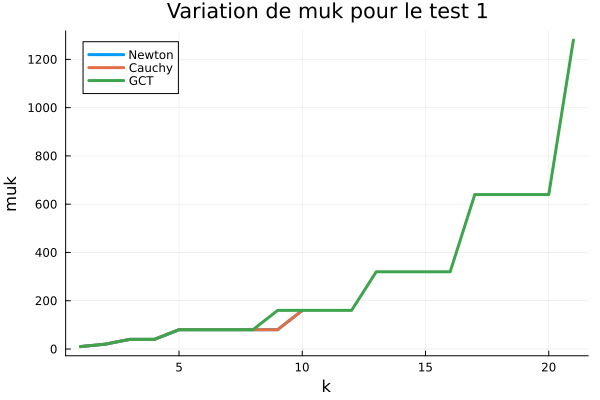

In [80]:
plot(muk1, title="Variation de muk pour le test 1", label=["Newton" "Cauchy" "GCT"], xlabel="k", ylabel = "muk", linewidth=3)

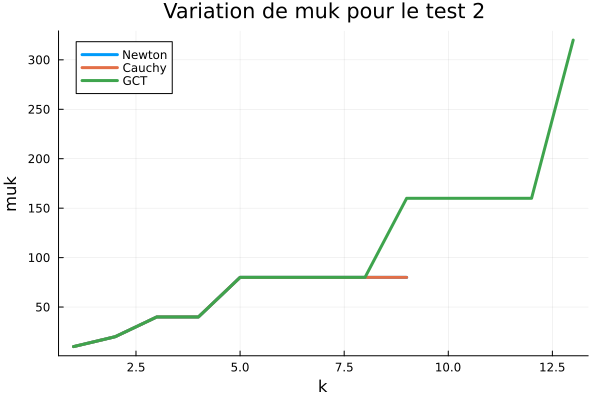

In [81]:

plot(muk2, title="Variation de muk pour le test 2", label=["Newton" "Cauchy" "GCT"], xlabel="k", ylabel = "muk", linewidth=3)

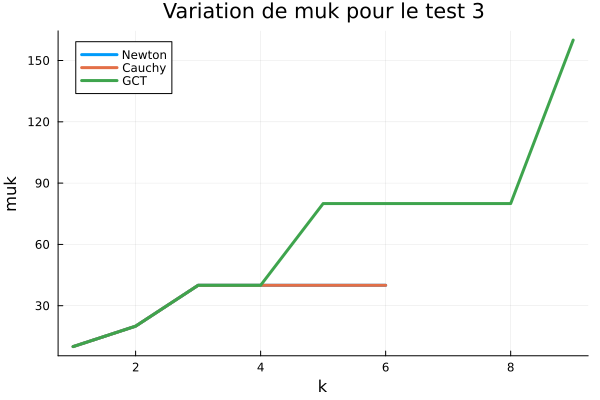

In [82]:

plot(muk3, title="Variation de muk pour le test 3", label=["Newton" "Cauchy" "GCT"], xlabel="k", ylabel = "muk", linewidth=3)

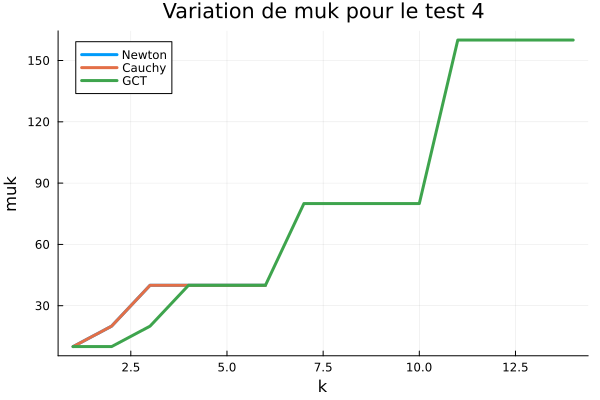

In [83]:
plot(muk4, title="Variation de muk pour le test 4", label=["Newton" "Cauchy" "GCT"], xlabel="k", ylabel = "muk", linewidth=3)

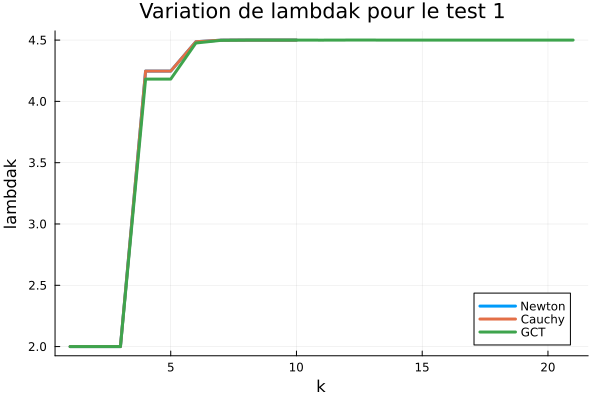

In [84]:
plot(lambdak1, title="Variation de lambdak pour le test 1", label=["Newton" "Cauchy" "GCT"], xlabel="k", ylabel = "lambdak", linewidth=3)

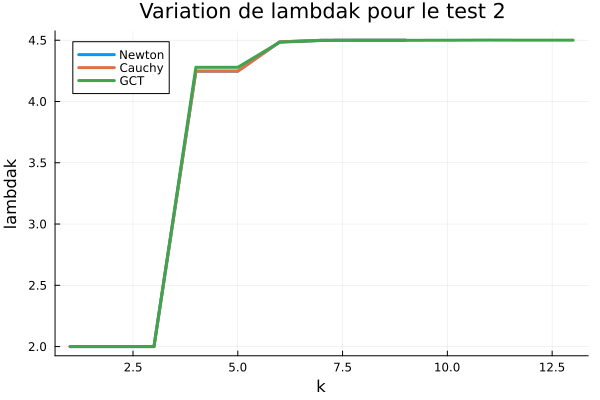

In [85]:
plot(lambdak2, title="Variation de lambdak pour le test 2", label=["Newton" "Cauchy" "GCT"], xlabel="k", ylabel = "lambdak", linewidth=3)

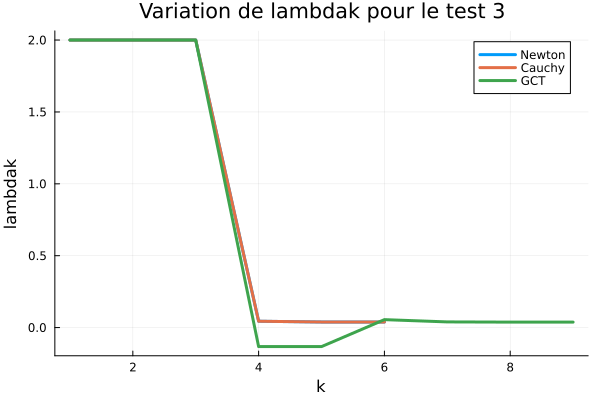

In [86]:
plot(lambdak3, title="Variation de lambdak pour le test 3", label=["Newton" "Cauchy" "GCT"], xlabel="k", ylabel = "lambdak", linewidth=3)

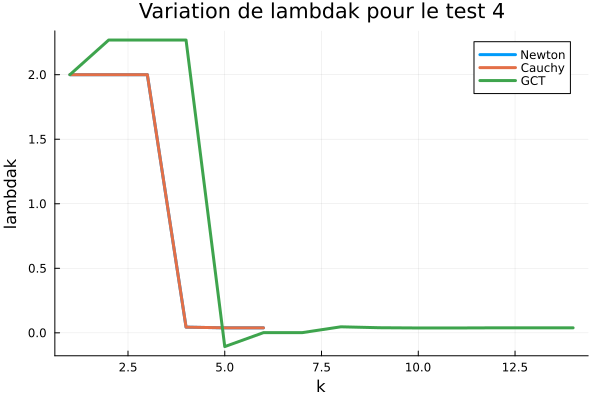

In [87]:
plot(lambdak4, title="Variation de lambdak pour le test 4", label=["Newton" "Cauchy" "GCT"], xlabel="k", ylabel = "lambdak", linewidth=3)

En fonction de chaque méthode, on peut remarquer que les muks et lambdaks évoluent de façon similaires avec de légères différences. Une de ces différences est que certaines méthodes sont plus efficaces que d'autres : comme indiquer dans le notebook regions_confiance, la méthode GCT est beaucoup plus longue que la méthode du pas de Cauchy : presque le double en nombre d'itération dans le test 4 par exemple.
Pour l'évolution de muk, on peut noter une évolution soit linéaire (test 4 par exemple), soit exponentielle (test 1) en fonction du nombre d'itération, mais dans les 4 cas sont croissants.
Tandis que pour l'évolution de lambdak, on remarque que ce dernier changent principalement durant les premières itérations avant de stagner. Cependant, contrairement à muk, on peut à la fois avoir lambdak qui augmente (tests 1 et 2) ou qui diminue (tests 3 et 4). Cela indique que les contraintes aux états k sont positives dans les premiers tests, alors qu'elles sont négatives dans les derniers.

In [88]:
lambda0 = 2
mu0 = 10
tho = 2
epsilon = 1.
tol = 1e-5
max_iters = 1000
algos = ["newton", "gct", "cauchy"]

nb_iters_res = []
for algo in algos
    nb_iters_algo = []
    for pow in 0:8       
        options = [epsilon, tol, max_iters, lambda0, mu0, 2^pow]
        _,_,_,iter,_,_ = Lagrangien_Augmente(algo,fct1,contrainte1,grad_fct1,hess_fct1,grad_contrainte1,hess_contrainte1,pts2.x01,options)
        push!(nb_iters_algo,iter)
    end
    push!(nb_iters_res,nb_iters_algo)
end
println(nb_iters_res)

Any[Any[1000, 9, 7, 6, 6, 5, 5, 4, 4], Any[1000, 9, 7, 6, 6, 5, 5, 4, 4], Any[1000, 20, 13, 11, 8, 6, 6, 6, 6]]


| $\tau$ | nb_iter Algo Newton | nb_iter Pas Cauchy | nb_iter GCT |
|--------|---------------------|--------------------|-------------|
| 1 | 1000 | 1000 | 1000 |
| 2 | 9 | 9 | 20 |
| 4 | 7 | 7 | 13 |
| 8 | 6 | 6 | 11 |
| 16 | 6 | 6 | 8 |
| 32 | 5 | 5 | 6 |
| 64 | 5 | 5 | 6 |
| 128 | 4 | 4 | 6 |
| 256 | 4 | 4 | 6 |

On remarque que lorsque $\tau\leq1$, la méthode atteint son nombre maximal d'itération, ce qui est logique car dans ce cas, $\mu_k$ et $\lambda_k$ n'évoluent pas ou augmentent ce qui ne permet pas d'évoluer sur la gestion de la contrainte dans l'algorithme et donc ne permet pas la résolution.
Lorsque $\tau$ augmente, on remarque que le nombre d'itérations diminue, ce qui montre que pour un algorithme efficace, il faut que $\tau$ soit grand.